In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [88]:
df = pd.read_csv('data/calenviroscreen40.csv')
df_noNan = df[df.ne(-999).all(axis=1)]
df_noNan = df_noNan[df.ne(-1998).all(axis=1)]

/tmp/ipykernel_215/1079905567.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_noNan = df_noNan[df.ne(-1998).all(axis=1)]


In [77]:
# All columns

cols_P = [c for c in df_noNan.columns if c.endswith("P")]
cols_race = ['White', 'Hispanic', 'AfricanAm', 'AAPI', 'NativeAm', 'OtherMult']
all_cols = list(set(cols_P + cols_race))
all_cols = [c for c in all_cols if c != "ZIP"]
df_clean = df_noNan[all_cols]
# df_clean = df_clean[df_clean[all_cols] >= 0]

In [78]:
df_clean

,HazWasteP,Tox_Rel_P,OzoneP,CardiovasP,PovertyP,AsthmaP,CIscoreP,ImpWatBodP,Ling_IsolP,PopCharP,...,AAPI,Lead_P,GWThreatP,DrinkWatP,AfricanAm,TrafficP,PM2_5_P,HousBurdP,SolWasteP,White
0,64.765056,9.914979,10.566273,52.006481,89.660804,86.652542,69.162885,77.299454,83.840845,79.828543,...,8.2091,36.118463,94.720239,11.165230,0.4004,63.4000,10.031114,69.150824,0.000000,20.8899
1,95.552614,10.265066,11.561917,10.817547,83.040201,54.798106,70.637922,82.969341,83.840845,56.555724,...,4.6990,43.805923,99.767558,52.828775,2.5051,19.9000,10.454263,60.101394,97.640321,13.2240
2,23.719391,10.515129,10.566273,52.006481,52.876884,86.652542,61.069087,77.299454,72.256056,67.183560,...,0.5421,75.072464,39.448780,11.165230,0.9591,42.7500,9.931549,53.624842,70.423826,30.6088
3,35.618795,7.864466,13.615432,32.415254,7.550251,43.344965,5.988401,0.000000,0.000000,10.741301,...,3.6699,11.077505,2.108584,32.559011,0.9342,39.9250,10.653391,16.311787,0.000000,69.1948
4,37.683653,7.714429,13.615432,32.415254,35.150754,43.344965,23.121533,0.000000,33.306266,46.280888,...,3.2685,49.514808,0.000000,32.559011,0.6986,24.3625,10.690728,12.002535,35.715922,59.7804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,52.640635,69.217304,88.699440,39.705882,31.733668,53.950648,30.610187,33.158337,48.721072,22.339889,...,9.1590,80.340265,11.306658,66.866492,1.5733,18.7625,72.109521,40.899873,11.592211,53.3995
8031,26.671079,70.430108,79.987554,11.839482,41.030151,7.614656,22.566818,0.000000,73.095141,16.502774,...,55.9221,52.715816,30.881620,73.148495,3.3677,57.9875,70.242688,52.610900,0.000000,26.3918
8032,92.150893,74.356089,84.579963,36.889332,57.298995,51.856929,74.508321,23.876522,62.241169,43.582955,...,15.5223,57.996219,84.144114,60.334707,8.9967,79.2625,72.906036,29.721166,87.949599,16.1438
8033,58.808736,91.047762,46.994400,96.684945,91.557789,62.076271,97.049924,66.736665,88.699418,92.939990,...,0.0000,94.820416,63.423543,71.362558,0.6728,62.4000,79.452396,64.461343,52.898053,6.9425


In [80]:
inertias = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_clean)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_clean, kmeans.labels_))

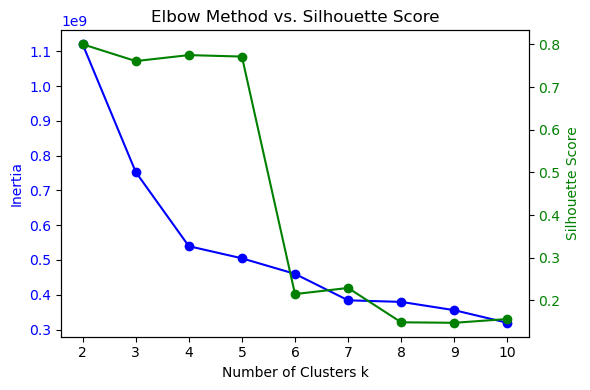

In [81]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Primary y-axis: Inertia (Elbow Method)
ax1.plot(k_range, inertias, 'bo-', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Secondary y-axis: Silhouette Score
ax2 = ax1.twinx()
ax2.plot(k_range, sil_scores, 'go-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and layout
plt.title('Elbow Method vs. Silhouette Score')
fig.tight_layout()
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5, random_state=27).fit(df_clean)

In [83]:
labels = kmeans.labels_

In [84]:
df_clean["cluster"] = labels

/tmp/ipykernel_215/4032614413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["cluster"] = labels


In [85]:
cluster_means = df_clean.groupby("cluster").mean(numeric_only=True)

In [86]:
cluster_means = df_clean.groupby("cluster")[all_cols].mean()

In [87]:
cluster_means

,HazWasteP,Tox_Rel_P,OzoneP,CardiovasP,PovertyP,AsthmaP,CIscoreP,ImpWatBodP,Ling_IsolP,PopCharP,...,AAPI,Lead_P,GWThreatP,DrinkWatP,AfricanAm,TrafficP,PM2_5_P,HousBurdP,SolWasteP,White
cluster,,,,,,,,,,,,,,,,,,,,,
0,40.765176,42.023697,54.700509,55.404703,47.181485,53.571071,48.803904,32.401824,-999.000000,53.026479,...,7.847906,38.764566,35.708845,48.684537,6.749184,41.779146,42.985556,-14.865213,32.275467,46.978086
1,45.702680,46.353932,48.843186,43.031842,-605.128141,41.351259,-999.000000,37.228318,-958.642656,-999.000000,...,8.240858,-832.600906,37.040096,-16.410898,12.105635,-86.485000,44.473086,-985.531670,35.772337,39.805881
2,52.663398,61.054863,56.750350,64.790347,70.278288,67.319037,74.630295,28.414075,67.049780,73.243229,...,12.603037,68.080808,42.077776,60.134121,7.604861,54.324817,64.103341,66.517996,31.755834,19.621062
3,39.286565,38.747864,49.731228,44.743841,49.839876,44.245648,39.949046,37.131632,-51.885873,43.286214,...,9.999675,31.577016,37.263960,44.944163,5.068509,31.060104,35.615951,1.026347,35.325315,53.626956
4,43.128093,39.502292,44.936305,35.511775,29.389463,33.056446,25.946968,34.977834,29.626470,26.906108,...,16.081657,31.956260,33.635135,40.816782,3.345898,40.606483,37.235282,28.303202,23.431728,56.405663
